Shape of Train Data : (15604, 27)
Shape of Test Data : (3901, 27)


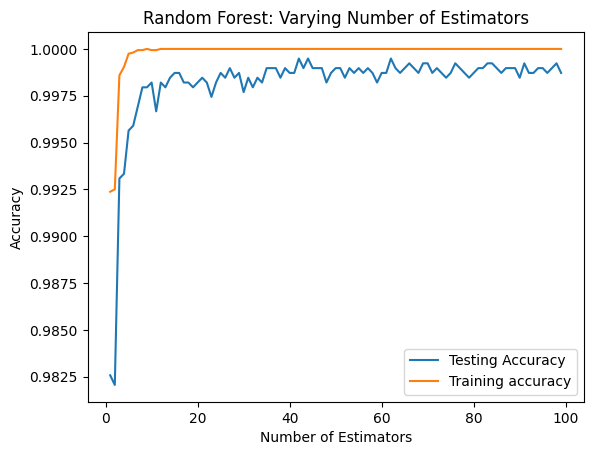

Optimal Number of Estimators: 41
Max Test Accuracy: 0.9994873109459113
Random Forest Metrics:
Accuracy:  0.9984619328377339
Precision:  0.9984800778365867
Recall:  0.998437240434237
F1-score:  0.9984573745021224


In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
x_path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\feature_VBL-VA001.csv'
y_path = r'D:\Kuliah\SMT 6\Pembelajaran Mesin\VBL-VA001-master\data\label_VBL-VA001.csv'

x = pd.read_csv(x_path, header=None)
y = pd.read_csv(y_path, header=None)

# Convert to 1D array
y = pd.Series.ravel(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True
)

print("Shape of Train Data : {}".format(X_train.shape))
print("Shape of Test Data : {}".format(X_test.shape))

# Setup arrays to store training and test accuracies
n_estimators = np.arange(1, 100)
train_accuracy = np.empty(len(n_estimators))
test_accuracy = np.empty(len(n_estimators))

for i, n in enumerate(n_estimators):
    # Setup a Random Forest classifier with n_estimators
    rf = RandomForestClassifier(n_estimators=n)
    # Fit the model
    rf.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i] = rf.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i] = rf.score(X_test, y_test)

# Generate plot
plt.plot(n_estimators, test_accuracy, label='Testing Accuracy')
plt.plot(n_estimators, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest: Varying Number of Estimators')
plt.show()

# Print optimal number of estimators and max test accuracy
optimal_n_estimators = np.argmax(test_accuracy)
max_test_accuracy = max(test_accuracy)
print(f"Optimal Number of Estimators: {optimal_n_estimators}")
print(f"Max Test Accuracy: {max_test_accuracy}")

# Train Random Forest with optimal number of estimators
rf = RandomForestClassifier(n_estimators=optimal_n_estimators)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print("Random Forest Metrics:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


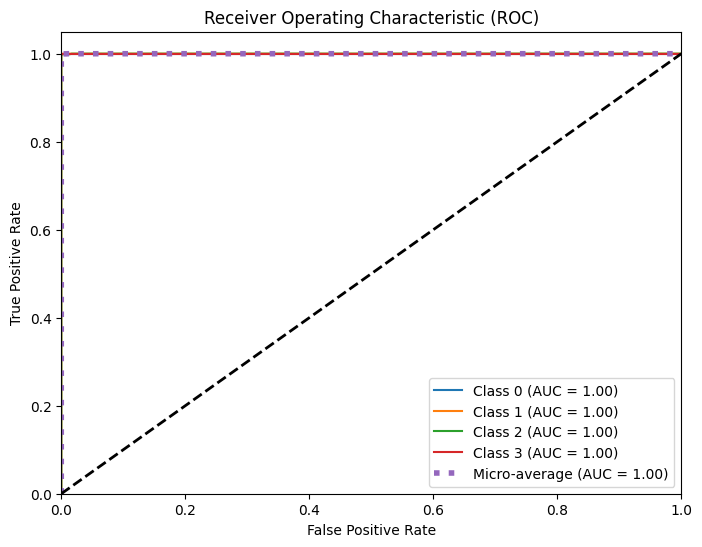

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Convert labels to binary format
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=optimal_n_estimators)
rf.fit(X_train, y_train)

# Predict probabilities for each class
y_prob = rf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob[:, i])

# Compute ROC curve and AUC for micro-average
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_bin, y_prob, average='micro')

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:.2f})'.format(i, roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, label='Micro-average (AUC = {0:.2f})'.format(roc_auc_micro), linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
